# Mie Basics

** Scott Prahl**

** 1 Mar 2018, Version 3**

In [1]:
# Execute this cell first
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# if miepython is missing, do `pip install miepython`
import miepython as mp

## Index of Refraction and Size Parameter

When a monochromatic plane wave is incident on a sphere, it scatters and absorbs light depending on the properties of the light and sphere.  If the sphere is in a vacuum, then the complex index of refraction of the sphere is
$$
m_\mathrm{vac}= m_\mathrm{re}- j\,m_\mathrm{im}
$$
The factor $m_\mathrm{im}=\kappa$ is the *index of absorption* or the *index of attenuation*.  

The non-dimensional sphere size parameter for a sphere in a vacuum is
$$
x_\mathrm{vac} = {2\pi r  \over \lambda_\mathrm{vac}}
$$
where $r$ is the radius of the sphere and $\lambda_\mathrm{vac}$ is the wavelength of the light in a vacuum.

If the sphere is in a non-absorbing environment with real index $n_\mathrm{env}$ then the Mie scattering formulas can still be used, but the index of refraction of the sphere is now 
$$
m= {m_\mathrm{re}- j\,m_\mathrm{im}\over n_\mathrm{env}}
$$
The wavelength in the sphere size parameter should be the wavelength of the plane wave in the environment, thus
$$
x = {2\pi r  \over \lambda_\mathrm{vac}/n_\mathrm{env}}
$$

### Sign Convention
The sign of the imaginary part of the index of refraction in `miepython` is assumed negative (as shown above).  This convention is standard for atmospheric science and follows that of van de Hulst.

### Absorption Coefficient

The imaginary part of the refractive index is a non-dimensional representation of light absorption.  This can be seen by writing out the equation for a monochromatic, planar electric field

$$
\mathcal{E}(z,t) = \mathcal{E}_0 e^{j (k z - \omega t)}
$$
where $k$ is the complex wavenumber 
$$
k=k_\mathrm{re}-k_\mathrm{im}={2\pi m_\mathrm{re}\over \lambda_\mathrm{vac}}-j {2\pi m_\mathrm{im}\over \lambda_\mathrm{vac}}
$$
Thus
$$
\mathcal{E}(z,t) = \mathcal{E}_0 e^{-k_\mathrm{im}z}e^{j (k_\mathrm{re} z - \omega t)}
$$
and the corresponding time-averaged irradiance $E(z)$
$$
E(z) = {1\over2} c\epsilon |\mathcal{E}|^2 = E_0 \exp(-2k_\mathrm{im}z) = E_0 \exp(-\mu_a z)
$$
and therefore
$$
\mu_a = 2k_\mathrm{im} = 4\pi\cdot { m_\mathrm{im}\over \lambda_\mathrm{vac}}
$$
Thus the imaginary part of the index of refraction is basically just the absorption coefficient measured in wavelengths.

### Complex Refractive Index of Water
Let's import and plot some data from the M.S. Thesis of D. Segelstein, "The Complex Refractive Index of Water",
University of Missouri--Kansas City, (1981) to get some sense the complex index of refraction.  The imaginary part shows absorption peaks at 3 and 6 microns, as well as the broad peak starting at 10 microns.

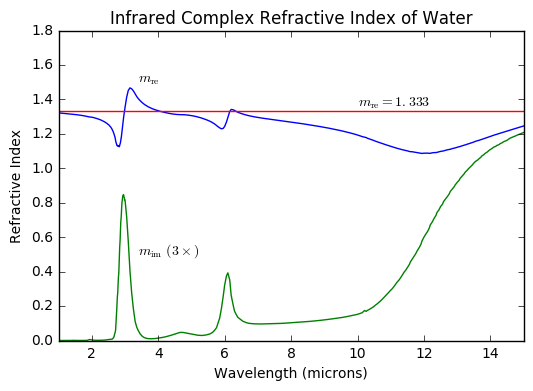

In [7]:
#import the Segelstein data
h2o = np.genfromtxt('http://omlc.org/spectra/water/data/segelstein81_index.txt', delimiter='\t', skip_header=4)
h2o_lam = h2o[:,0]
h2o_mre = h2o[:,1]
h2o_mim = h2o[:,2]

#plot it
plt.plot(h2o_lam,h2o_mre)
plt.plot(h2o_lam,h2o_mim*3)
plt.plot((1,15),(1.333,1.333))
plt.xlim((1,15))
plt.ylim((0,1.8))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Refractive Index')
plt.annotate(r'$m_\mathrm{re}$', xy=(3.4,1.5))
plt.annotate(r'$m_\mathrm{im}\,\,(3\times)$', xy=(3.4,0.5))
plt.annotate(r'$m_\mathrm{re}=1.333$', xy=(10,1.36))

plt.title('Infrared Complex Refractive Index of Water')

plt.show()

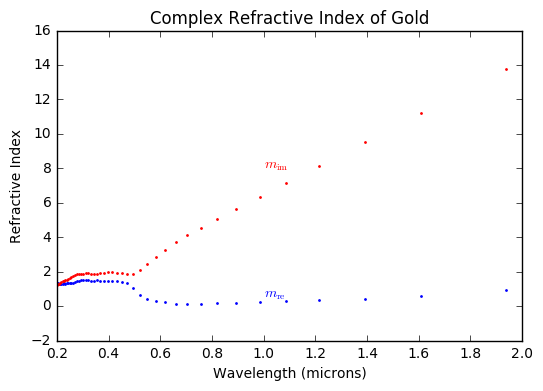

In [8]:
# import the Johnson and Christy data for gold
au = np.genfromtxt('https://refractiveindex.info/data_txt.php?datafile=main/Au/Johnson.yml', delimiter='\t')

# data is stacked so need to rearrange
N = len(au)//2
au_lam = au[1:N,0]
au_mre = au[1:N,1]
au_mim = au[N+1:,1]

plt.scatter(au_lam,au_mre,s=1,color='blue')
plt.scatter(au_lam,au_mim,s=1,color='red')
plt.xlim((0.2,2))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Refractive Index')
plt.annotate(r'$m_\mathrm{re}$', xy=(1.0,0.5),color='blue')
plt.annotate(r'$m_\mathrm{im}$', xy=(1.0,8),color='red')

plt.title('Complex Refractive Index of Gold')

plt.show()

### The Absorption Coefficient

The imaginary part of the refractive index is a non-dimensional representation of light absorption.  This can be seen by writing out the 
$$
E(z,t) = E_0 \exp(-j (k z - \omega t))
$$
where $k$ is the complex wavenumber 
$$
k=k_\mathrm{re}-k_\mathrm{im}={2\pi m_\mathrm{re}\over \lambda_\mathrm{vacuum}}-j {2\pi m_\mathrm{im}\over \lambda_\mathrm{vacuum}}
$$
Thus
$$
E(z,t) = E_0 \exp(-k_\mathrm{im}z)\exp(j (k_\mathrm{re} z - \omega t))
$$
and the corresponding irradiance 
$$
I(z) = {1\over2} c\epsilon |E|^2 = I_0 \exp(-2k_\mathrm{im}z) = I_0 \exp(-\mu_a z)
$$
and therefore
$$
\mu_a = 2k_\mathrm{im} = {4\pi m_\mathrm{im}\over \lambda_\mathrm{vacuum}}
$$
Thus the imaginary part of the index of refraction is basically just the absorption coefficient measured in wavelengths.

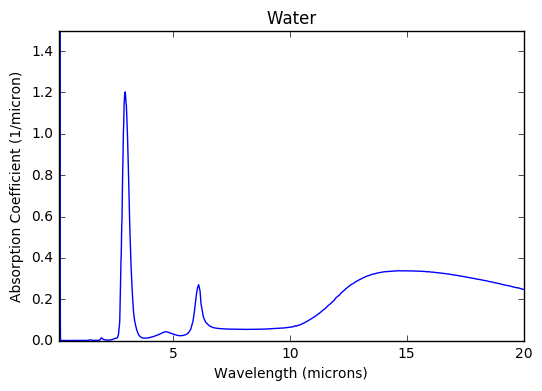

In [10]:
mua = 4*np.pi* h2o_mim/h2o_lam

plt.plot(h2o_lam,mua)
plt.xlim((0.1,20))
plt.ylim((0,1.5))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Absorption Coefficient (1/micron)')

plt.title('Water')

plt.show()

# Size Parameters

## Size Parameter $x$
The sphere size relative to the wavelength is called the size 
parameter $x$ 
$$
x = 2\pi {r/\lambda}
$$
where $r$ is the radius of the sphere.

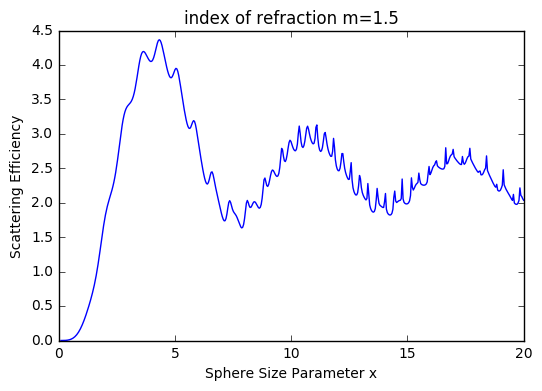

In [11]:
N=500
m=1.5
x = np.linspace(0.1,20,N)  # also in microns

qext, qsca, qback, g = mp.mie(m,x)

plt.plot(x,qsca)
plt.xlabel("Sphere Size Parameter x")
plt.ylabel("Scattering Efficiency")
plt.title("index of refraction m=1.5")
plt.show()

### Size Parameter $\rho$

The value $\rho$ is also sometimes used to facilitate comparisons for spheres with different indicies of refraction
$$
\rho = 2x(m-1)
$$
Note that when $m=1.5$ and therefore $\rho=x$. 

As can be seen in the graph below, the scattering for spheres with different indicies of refraction pretty similar when plotted against $\rho$, but no so obvious when plotted against $x$ 

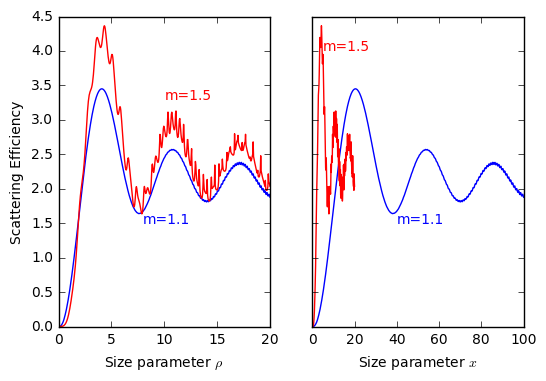

In [12]:
N=500
m=1.5
rho = np.linspace(0.1,20,N)  # also in microns

m = 1.5
x15 = rho/2/(m-1)
qext, sca15, qback, g = mp.mie(m,x15)

m = 1.1
x11 = rho/2/(m-1)
qext, sca11, qback, g = mp.mie(m,x11)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(rho,sca11,color='blue')
ax1.plot(rho,sca15,color='red')
ax1.set_xlabel(r"Size parameter $\rho$")
ax1.set_ylabel("Scattering Efficiency")
ax1.annotate('m=1.5', xy=(10,3.3), color='red')
ax1.annotate('m=1.1', xy=(8,1.5), color='blue')

ax2.plot(x11,sca11,color='blue')
ax2.plot(x15,sca15,color='red')
ax2.set_xlabel(r"Size parameter $x$")
ax2.annotate('m=1.5', xy=(5,4), color='red')
ax2.annotate('m=1.1', xy=(40,1.5), color='blue')

plt.show()

### Handling spheres embedded in a medium with index of refraction different from unity

The short answer is that everything just scales.  

Specifically, divide the index of the sphere $m$ by the index of the surrounding material to get a relative index $m'$
$$
m' ={m\over n_\mathrm{surroundings}}
$$
The wavelength in the surrounding medium $\lambda'$ is also altered
$$
\lambda' = {\lambda_\mathrm{vacuum}\over n_\mathrm{surroundings}}
$$
Thus, the relative size parameter $x'$ becomes
$$
x' = {2 \pi r \over \lambda'}= {2 \pi r n_\mathrm{surroundings}\over \lambda_\mathrm{vacuum}}
$$
Scattering calculations for an embedded sphere uses $m'$ and $x'$ instead of $m$ and $x$.

If the spheres are air ($m=1$) bubbles in water ($m=4/3$), then the relative index of refraction will be about 
$$
m' =  m/n_\mathrm{water} \approx 1.0/(4/3) = 3/4 = 0.75
$$

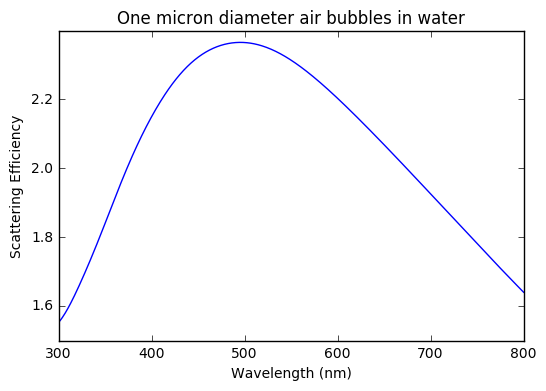

In [13]:
N=500
m=1.0
r=500                            # nm
lambdaa = np.linspace(300,800,N)  # also in nm

mwater = 4/3   # rough approximation
mm = m/mwater
xx = 2*np.pi*r*mwater/lambdaa

qext, qsca, qback, g = mp.mie(mm,xx)

plt.plot(lambdaa,qsca)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Scattering Efficiency")
plt.title("One micron diameter air bubbles in water")
plt.show()